In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
seed = 0
np.random.seed(seed)

Os dados que serão usados estão disponíveis no Kaggle e também no link abaixo

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [4]:
def data_description():
    import webbrowser
    url = 'https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/329925?select=heart.csv'
    webbrowser.open(url)

In [6]:
saturation = pd.read_csv('o2Saturation.csv')
saturation = saturation.rename(columns={'98.6' : 'o2Saturation'})
saturation.head()
saturation.shape

(3585, 1)

In [7]:
df = pd.read_csv('heart.csv')
df = pd.concat([df, saturation], axis=1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [232]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [233]:
df.isnull().sum()

age             3282
sex             3282
cp              3282
trtbps          3282
chol            3282
fbs             3282
restecg         3282
thalachh        3282
exng            3282
oldpeak         3282
slp             3282
caa             3282
thall           3282
output          3282
o2Saturation       0
dtype: int64

In [234]:
df.isna().sum()

age             3282
sex             3282
cp              3282
trtbps          3282
chol            3282
fbs             3282
restecg         3282
thalachh        3282
exng            3282
oldpeak         3282
slp             3282
caa             3282
thall           3282
output          3282
o2Saturation       0
dtype: int64

In [235]:
df = df.dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

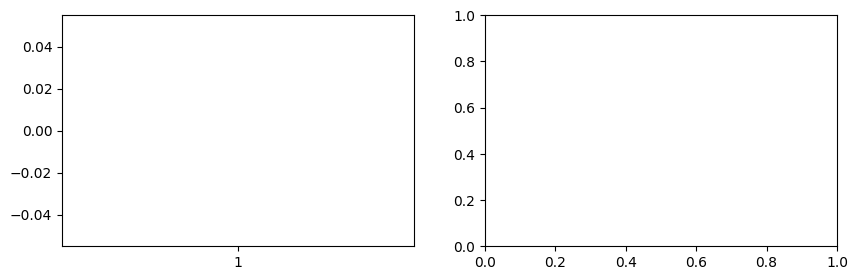

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].boxplot(df['age'])
ax[1].hist(df['age'])


Apenas pela média já era notável que pessoas com idade um pouco mais elevada e homens tem mais chances de um ataque

<AxesSubplot: xlabel='sex', ylabel='count'>

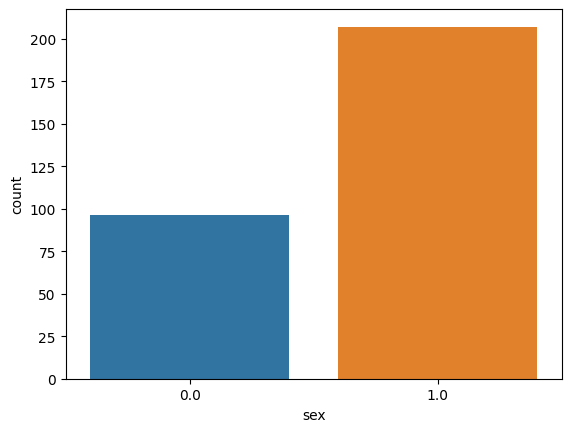

In [237]:
sns.countplot(data=df, x='sex')

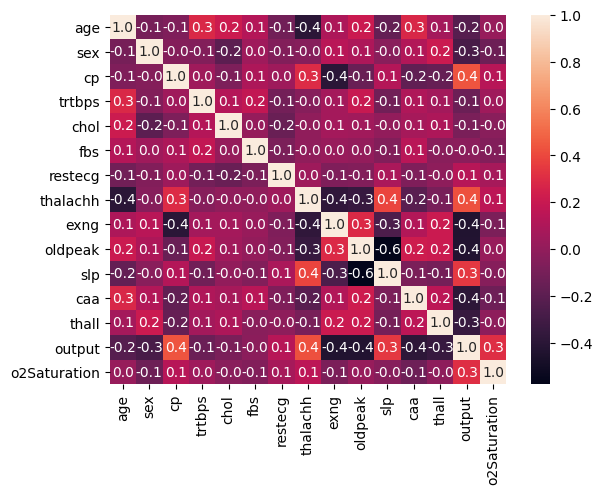

In [238]:
corr = df.corr()

sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

In [239]:
x = df.drop('output', axis=1)
y = df['output']
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)


display(x.head())
display(y.head())


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,97.5


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: output, dtype: float64

In [240]:
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x_scaled = scaler.transform(raw_train_x)
test_x_scaled = scaler.transform(raw_test_x)

In [241]:
paramns = {
    'criterion' : ['gini', 'entropy'],
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
}

search_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                    paramns,
                    cv = StratifiedKFold(n_splits = 5, shuffle=True), n_iter=62)
search_tree.fit(x, y)
results_tree = pd.DataFrame(search_tree.cv_results_)
results_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0030,0.000632,0.001800,0.000399,entropy,15,40,57,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.655738,0.688525,0.770492,0.75,0.766667,0.726284,0.045935,21
1,0.0028,0.000748,0.001600,0.000489,entropy,30,118,48,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.721311,0.573770,0.688525,0.75,0.766667,0.700055,0.068504,55
2,0.0026,0.000490,0.001600,0.000490,entropy,None,69,33,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.655738,0.688525,0.688525,0.75,0.766667,0.709891,0.041660,26
3,0.0026,0.000489,0.001601,0.000800,entropy,None,44,122,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.655738,0.688525,0.770492,0.75,0.766667,0.726284,0.045935,21
4,0.0022,0.000400,0.002200,0.000402,gini,15,86,110,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.655738,0.688525,0.688525,0.75,0.766667,0.709891,0.041660,26


In [242]:
scores_tree = cross_val_score(search_tree, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))
scores_tree

array([0.70491803, 0.78688525, 0.78688525, 0.68333333, 0.75      ])

In [243]:
search_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=103, min_samples_split=77)

In [244]:
search_tree.best_score_

0.7590710382513661

In [245]:
def print_score(scores):
    mean = scores.mean() * 100
    std = scores.std() * 100
    print("Accuracy médio %.2f" % mean)
    print("Intervalo [%.2f, %.2f]" % (mean - 1.96 * std, mean + 1.96 * std))

In [246]:
print_score(scores_tree)

Accuracy médio 74.24
Intervalo [65.97, 82.51]


In [247]:
search_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                    paramns,
                    cv = StratifiedKFold(n_splits = 5, shuffle=True), n_iter=62)
search_random_forest.fit(x, y)
results_random_forest = pd.DataFrame(search_random_forest.cv_results_)
results_random_forest.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126997,0.007242,0.010201,0.000400,gini,None,123,99,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.540984,0.540984,0.540984,0.550000,0.550000,0.544590,0.004417,36
1,0.125010,0.007721,0.011001,0.000894,entropy,None,78,119,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.540984,0.540984,0.540984,0.550000,0.616667,0.557923,0.029578,35
2,0.124810,0.005419,0.011201,0.000748,gini,15,45,64,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.852459,0.836066,0.803279,0.800000,0.800000,0.818361,0.021808,13
3,0.126010,0.004382,0.011201,0.000749,gini,10,57,105,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.819672,0.770492,0.852459,0.783333,0.800000,0.805191,0.028819,20
4,0.139411,0.028727,0.011208,0.000992,entropy,20,49,55,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.868852,0.836066,0.852459,0.800000,0.816667,0.834809,0.024547,5


In [248]:
scores_random_forest = cross_val_score(search_random_forest, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))
scores_random_forest

array([0.80327869, 0.8852459 , 0.78688525, 0.83333333, 0.85      ])

In [249]:
search_random_forest.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=41, min_samples_split=63)

In [250]:
search_random_forest.best_score_

0.8415846994535517

In [251]:
print_score(scores_random_forest)

Accuracy médio 83.17
Intervalo [76.37, 89.98]


In [252]:
model_svc = SVC()
cross_svc = cross_validate(model_svc, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

mean_svc = cross_svc['test_score'].mean()
std_svc = cross_svc['test_score'].std()

print(mean_svc * 100)
print('Accuracy: [%.2f, %.2f]' % ((mean_svc - 1.96 * std_svc) * 100, (mean_svc + 1.96 * std_svc) * 100))

66.00546448087432
Accuracy: [58.73, 73.28]


In [253]:
model_ber = BernoulliNB()
cross_ber = cross_validate(model_ber, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

mean_ber = cross_ber['test_score'].mean()
std_ber = cross_ber['test_score'].std()

print(mean_ber * 100)
print('Accuracy: [%.2f, %.2f]' % ((mean_ber - 1.96 * std_ber) * 100, (mean_ber + 1.96 * std_ber) * 100))

82.49180327868852
Accuracy: [74.56, 90.42]


Dados scalados 

In [254]:
search_tree_scaled = RandomizedSearchCV(DecisionTreeClassifier(),
                    paramns,
                    cv = StratifiedKFold(n_splits = 5, shuffle=True), n_iter=62)
search_tree_scaled.fit(x_scaled, y)
results_tree_scaled = pd.DataFrame(search_tree_scaled.cv_results_)
results_tree_scaled.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002601,8.008846e-04,0.001800,0.000748,gini,None,46,102,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754098,0.786885,0.622951,0.733333,0.783333,0.73612,0.059907,38
1,0.002400,4.907629e-04,0.001400,0.000490,gini,20,80,121,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.803279,0.704918,0.622951,0.733333,0.816667,0.73623,0.070408,21
2,0.002401,4.905443e-04,0.001200,0.000400,entropy,15,112,105,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.803279,0.819672,0.622951,0.733333,0.816667,0.75918,0.075014,1
3,0.002000,4.101908e-07,0.001601,0.000801,gini,20,32,94,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.754098,0.786885,0.622951,0.733333,0.783333,0.73612,0.059907,38
4,0.002600,8.006932e-04,0.001401,0.000802,gini,30,78,123,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.803279,0.704918,0.622951,0.733333,0.816667,0.73623,0.070408,21


In [255]:
scores_tree_scaled = cross_val_score(search_tree_scaled, x_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True))
scores_tree_scaled

array([0.80327869, 0.75409836, 0.7704918 , 0.76666667, 0.7       ])

In [256]:
search_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=103, min_samples_split=77)

In [257]:
search_tree_scaled.best_score_

0.7591803278688525

In [258]:
print_score(scores_tree_scaled)

Accuracy médio 75.89
Intervalo [69.30, 82.48]


Podemos visualizar que o resultado deu uma pequena melhora, terei como premissa que o mesmo é válido para o RandomForest

In [259]:
cross_ber_scaled = cross_validate(model_ber, x_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

mean_ber_scaled = cross_ber_scaled['test_score'].mean()
std_ber_scaled = cross_ber_scaled['test_score'].std()

print(mean_ber_scaled * 100)
print('Accuracy: [%.2f, %.2f]' % ((mean_ber_scaled - 1.96 * std_ber_scaled) * 100, (mean_ber_scaled + 1.96 * std_ber_scaled) * 100))

84.14207650273224
Accuracy: [72.22, 96.07]


Os modelos que serão testados serão o RandomForestClassifiers e o Naives Bayes, ambos com os valores escalados

In [260]:
model_rfc = search_random_forest.best_estimator_


In [261]:
model_rfc.fit(train_x_scaled, train_y)

RandomForestClassifier(max_depth=15, min_samples_leaf=41, min_samples_split=63)

In [262]:
predict_rfc = model_rfc.predict(test_x_scaled)

In [263]:
def get_metrics(test_y, predict):
    accuracy = accuracy_score(test_y, predict) * 100
    precision = precision_score(test_y, predict) * 100
    recall = recall_score(test_y, predict) * 100
    f1 = f1_score(test_y, predict) * 100
    return accuracy, precision, recall, f1

In [264]:
accuracy_rfc, precision_rfc, recall_rfc, f1_rfc = get_metrics(test_y, predict_rfc)

In [265]:
model_ber.fit(train_x_scaled, train_y)

BernoulliNB()

In [266]:
predict_ber = model_ber.predict(test_x_scaled)

In [267]:
accuracy_ber, precision_ber, recall_ber, f1_ber = get_metrics(test_y, predict_ber)

In [268]:
index = ['Accuracy', 'Precision', 'Recall', 'F1']

In [269]:
compare = pd.DataFrame([accuracy_rfc, precision_rfc, recall_rfc, f1_rfc], columns=['RandomForestClassifier'], index=index)

compare = compare.assign(Naive = [accuracy_ber, precision_ber, recall_ber, f1_ber])
compare = compare.round(2)
compare

,RandomForestClassifier,Naive
Accuracy,86.81,86.81
Precision,82.76,86.54
Recall,96.00,90.00
F1,88.89,88.24


In [270]:
confusion_matrix_rfc = confusion_matrix(test_y, predict_rfc)
confusion_matrix_ber = confusion_matrix(test_y, predict_ber)

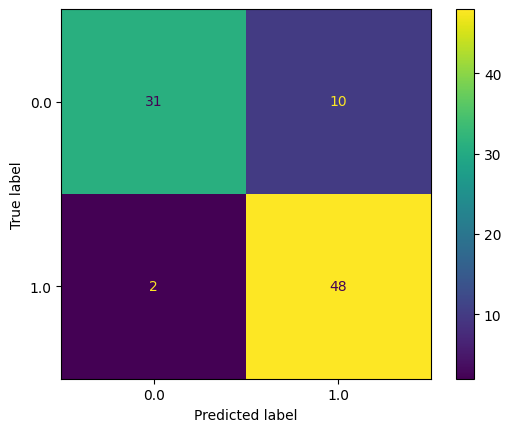

In [271]:
ConfusionMatrixDisplay.from_predictions(test_y, predict_rfc, labels=test_y.unique())
plt.grid(False)

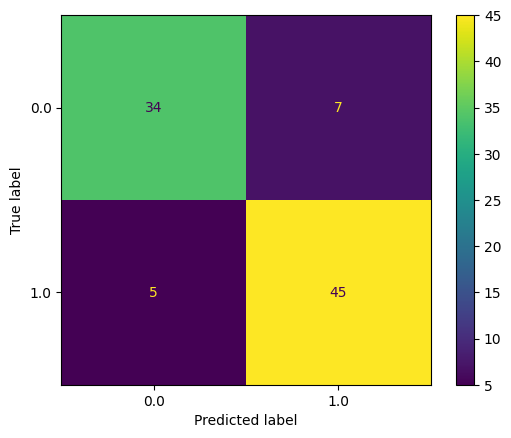

In [272]:
ConfusionMatrixDisplay.from_predictions(test_y, predict_ber, labels=test_y.unique())
plt.grid(False)

Levando em conta que um infarto pode levar uma pessoa a morte é muito mais interessante usarmos o modelo do RandomForest, já que é mais válido termos um pouco mais de alarme falso enquato compensamos com alguns acertos a mais.